<h1 style="font-size:40px;">Sprint 11 - Proyecto</h1> 

<h1 style="font-size:40px;">Descripcion del proyecto </h1> 

Este proyecto se desarrollará en el contexto de una startup tecnológica dedicada a la venta de productos alimenticios a través de una aplicación móvil. El objetivo principal es comprender el comportamiento de los usuarios dentro de la app y evaluar el impacto de un posible rediseño visual, con base en un cambio tipográfico.

El análisis se llevará a cabo sobre un conjunto de datos basado en eventos de interacción del usuario, en el cual cada fila representa una acción realizada dentro de la aplicación. A partir de este registro de eventos, se abordarán dos líneas principales de investigación:

1 Análisis del embudo de conversión
Se estudiará el recorrido de los usuarios desde que abren la aplicación hasta que completan una compra. Esto incluye la identificación de etapas clave (pantalla principal, ofertas, carrito, pago), el cálculo de tasas de conversión entre cada etapa y el análisis de dónde se pierden más usuarios. Esta parte del estudio permitirá evaluar la efectividad del diseño actual y detectar posibles puntos de fricción en la experiencia de usuario.


2.- Evaluación de un experimento A/A/B
Con el fin de medir el impacto de un cambio en la fuente tipográfica de la interfaz, se implementó un experimento controlado con tres grupos de usuarios:

Dos grupos de control (A/A) que utilizaron la fuente original.

Un grupo experimental (B) que interactuó con la nueva fuente.

Se compararán métricas clave de interacción y conversión entre los grupos para determinar si el cambio visual afecta el comportamiento del usuario. Además, el experimento sirve para validar la correcta segmentación aleatoria de usuarios y la integridad del sistema de experimentación.

Objetivo final
El propósito del proyecto es apoyar la toma de decisiones del equipo de producto sobre si implementar o no el nuevo diseño visual, basándose en datos objetivos sobre el comportamiento real de los usuarios, en lugar de percepciones subjetivas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

<h1 style="font-size:20px;">Paso 1 y 2 Limpieza de datos y preparar datos</h1> 

In [2]:
df = pd.read_csv('/datasets/logs_exp_us.csv')
print(df)

           EventName\tDeviceIDHash\tEventTimestamp\tExpId
0       MainScreenAppear\t4575588528974610257\t1564029...
1       MainScreenAppear\t7416695313311560658\t1564053...
2       PaymentScreenSuccessful\t3518123091307005509\t...
3       CartScreenAppear\t3518123091307005509\t1564054...
4       PaymentScreenSuccessful\t6217807653094995999\t...
...                                                   ...
244121  MainScreenAppear\t4599628364049201812\t1565212...
244122  MainScreenAppear\t5849806612437486590\t1565212...
244123  MainScreenAppear\t5746969938801999050\t1565212...
244124  MainScreenAppear\t5746969938801999050\t1565212...
244125  OffersScreenAppear\t5746969938801999050\t15652...

[244126 rows x 1 columns]


In [3]:
print(df.head(10))

      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...
5  CartScreenAppear\t6217807653094995999\t1564055...
6  OffersScreenAppear\t8351860793733343758\t15640...
7  MainScreenAppear\t5682100281902512875\t1564085...
8  MainScreenAppear\t1850981295691852772\t1564086...
9  MainScreenAppear\t5407636962369102641\t1564112...


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB
None


In [5]:
df_1 = df.iloc[:, 0].str.split('\t', expand=True)
df_1.columns = ['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']
print(df_1.head(10))

                 EventName         DeviceIDHash EventTimestamp ExpId
0         MainScreenAppear  4575588528974610257     1564029816   246
1         MainScreenAppear  7416695313311560658     1564053102   246
2  PaymentScreenSuccessful  3518123091307005509     1564054127   248
3         CartScreenAppear  3518123091307005509     1564054127   248
4  PaymentScreenSuccessful  6217807653094995999     1564055322   248
5         CartScreenAppear  6217807653094995999     1564055323   248
6       OffersScreenAppear  8351860793733343758     1564066242   246
7         MainScreenAppear  5682100281902512875     1564085677   246
8         MainScreenAppear  1850981295691852772     1564086702   247
9         MainScreenAppear  5407636962369102641     1564112112   246


In [6]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  object
 2   EventTimestamp  244126 non-null  object
 3   ExpId           244126 non-null  object
dtypes: object(4)
memory usage: 7.5+ MB
None


In [7]:
df_1['DeviceIDHash'] = df_1['DeviceIDHash'].astype(int)
df_1['ExpId'] = df_1['ExpId'].astype(int)
df_1['EventTimestamp'] = pd.to_datetime(df_1['EventTimestamp'], unit='s')

In [8]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   EventName       244126 non-null  object        
 1   DeviceIDHash    244126 non-null  int64         
 2   EventTimestamp  244126 non-null  datetime64[ns]
 3   ExpId           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB
None


In [9]:
print(df_1.head())

                 EventName         DeviceIDHash      EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248


In [10]:
df_1 = df_1.rename(columns={
    'EventName': 'event name',
    'DeviceIDHash': 'user id',
    'EventTimestamp': 'event time',
    'ExpId': 'exp id'
})


print(df_1.columns)

Index(['event name', 'user id', 'event time', 'exp id'], dtype='object')


In [11]:
print(df_1.isnull().sum())

event name    0
user id       0
event time    0
exp id        0
dtype: int64


In [12]:
print(df_1.duplicated().sum())

413


In [13]:
print(df_1[df_1.duplicated()])

                     event name              user id          event time  \
453            MainScreenAppear  5613408041324010552 2019-07-30 08:19:44   
2350           CartScreenAppear  1694940645335807244 2019-07-31 21:51:39   
3573           MainScreenAppear   434103746454591587 2019-08-01 02:59:37   
4076           MainScreenAppear  3761373764179762633 2019-08-01 03:47:46   
4803           MainScreenAppear  2835328739789306622 2019-08-01 04:44:01   
...                         ...                  ...                 ...   
242329         MainScreenAppear  8870358373313968633 2019-08-07 19:26:44   
242332  PaymentScreenSuccessful  4718002964983105693 2019-08-07 19:26:45   
242360  PaymentScreenSuccessful  2382591782303281935 2019-08-07 19:27:29   
242362         CartScreenAppear  2382591782303281935 2019-08-07 19:27:29   
242635         MainScreenAppear  4097782667445790512 2019-08-07 19:36:58   

        exp id  
453        248  
2350       248  
3573       248  
4076       247  
48

In [14]:
df_1['event time']
df_1['event date'] = df_1['event time'].dt.date


In [15]:
print(df_1.head(10))

                event name              user id          event time  exp id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   
5         CartScreenAppear  6217807653094995999 2019-07-25 11:48:43     248   
6       OffersScreenAppear  8351860793733343758 2019-07-25 14:50:42     246   
7         MainScreenAppear  5682100281902512875 2019-07-25 20:14:37     246   
8         MainScreenAppear  1850981295691852772 2019-07-25 20:31:42     247   
9         MainScreenAppear  5407636962369102641 2019-07-26 03:35:12     246   

   event date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  
5  2019-07-25  
6  2019-07-25  
7 

In [16]:
print(df_1.columns)

Index(['event name', 'user id', 'event time', 'exp id', 'event date'], dtype='object')


<h1 style="font-size:15px;">Analisis: </h1> 
    
Al analizar y cargar el dataset y limpiar los datos se realizaron las siguientes acciones:
    
- Se separaron las columas ya que aparecian como una sola columna.
-Se cambio el tipo de datos de la columa "DeviceIDHash" de object a entero y la columna event time de object a datetime.
-Se cambio el nombre de las columas para que fueran más legibles.
- Los elementos duplicados no fueron eliminados ya que pertenecian al usuario de id o id de expeimento y si fueran eliminados afectaria el analisis al momento de analizar los grupos, ademas de que pertenecian a diferentes eventos.

<h1 style="font-size:25px;">Paso 3 . Estudiar y comprobar los datos</h1> 

¿Cuántos eventos hay en los registros?

In [17]:
total_eventos = len(df_1)

print(f"Número total de eventos registrados: {total_eventos}")

Número total de eventos registrados: 244126


¿Cuántos usuarios hay en los registros?

In [18]:
usuarios_unicos = df_1['user id'].nunique()

print(f"Número total de usuarios únicos: {usuarios_unicos}")

Número total de usuarios únicos: 7551


¿Cuál es el promedio de eventos por usuario?

In [19]:
total_eventos = len(df_1)

usuarios_unicos = df_1['user id'].nunique()


promedio_eventos_por_usuario = total_eventos / usuarios_unicos

print(f"Promedio de eventos por usuario: {promedio_eventos_por_usuario:.2f}")

Promedio de eventos por usuario: 32.33


¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora.

In [20]:
df_1['event time'] = pd.to_datetime(df_1['event time'])


fecha_min = df_1['event time'].min()
fecha_max = df_1['event time'].max()

print(f"Fecha mínima: {fecha_min}")
print(f"Fecha máxima: {fecha_max}")

Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


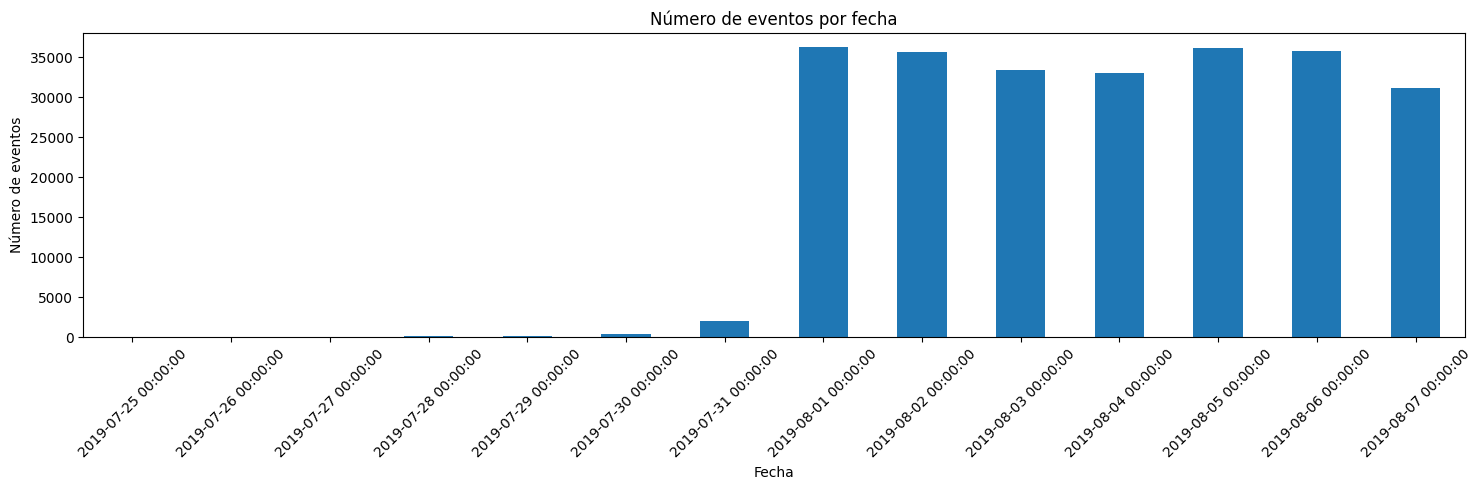

In [21]:
df_1['event date'] = pd.to_datetime(df_1['event date'])


eventos_por_fecha = df_1.groupby(df_1['event date']).size()


plt.figure(figsize=(15,5))
eventos_por_fecha.plot(kind='bar')
plt.title('Número de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [22]:
umbral = eventos_por_fecha.max() * 0.8


fechas_completas = eventos_por_fecha[eventos_por_fecha >= umbral]


fecha_inicio_confiable = fechas_completas.index.min()
fecha_fin_confiable = fechas_completas.index.max()

print(f"Los datos comienzan a estar completos desde: {fecha_inicio_confiable}")
print(f"Los datos confiables cubren el periodo: {fecha_inicio_confiable} hasta {fecha_fin_confiable}")

Los datos comienzan a estar completos desde: 2019-08-01 00:00:00
Los datos confiables cubren el periodo: 2019-08-01 00:00:00 hasta 2019-08-07 00:00:00


In [23]:
df_filtrado = df_1[df_1['event date'] >= fecha_inicio_confiable]
print(df_filtrado)

                event name              user id          event time  exp id  \
2828              Tutorial  3737462046622621720 2019-08-01 00:07:28     246   
2829      MainScreenAppear  3737462046622621720 2019-08-01 00:08:00     246   
2830      MainScreenAppear  3737462046622621720 2019-08-01 00:08:55     246   
2831    OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58     246   
2832      MainScreenAppear  1433840883824088890 2019-08-01 00:08:59     247   
...                    ...                  ...                 ...     ...   
244121    MainScreenAppear  4599628364049201812 2019-08-07 21:12:25     247   
244122    MainScreenAppear  5849806612437486590 2019-08-07 21:13:59     246   
244123    MainScreenAppear  5746969938801999050 2019-08-07 21:14:43     246   
244124    MainScreenAppear  5746969938801999050 2019-08-07 21:14:58     246   
244125  OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17     246   

       event date  
2828   2019-08-01  
2829   2019

¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [24]:
eventos_totales_antes = len(df_1)
usuarios_unicos_antes = df_1['user id'].nunique()

In [25]:
eventos_totales_despues = len(df_filtrado)
usuarios_unicos_despues = df_filtrado['user id'].nunique()

In [26]:
eventos_perdidos = eventos_totales_antes - eventos_totales_despues
porcentaje_eventos_perdidos = (eventos_perdidos / eventos_totales_antes) * 100


usuarios_perdidos = usuarios_unicos_antes - usuarios_unicos_despues
porcentaje_usuarios_perdidos = (usuarios_perdidos / usuarios_unicos_antes) * 100


print(f"Eventos perdidos: {eventos_perdidos} ({porcentaje_eventos_perdidos:.2f}%)")
print(f"Usuarios perdidos: {usuarios_perdidos} ({porcentaje_usuarios_perdidos:.2f}%)")

Eventos perdidos: 2828 (1.16%)
Usuarios perdidos: 17 (0.23%)


Asegúrate de tener usuarios de los tres grupos experimentales

In [27]:
grupos_presentes = df_filtrado['exp id'].unique()

print(f"Grupos experimentales presentes en los datos filtrados: {grupos_presentes}")

Grupos experimentales presentes en los datos filtrados: [246 247 248]


In [28]:
usuarios_por_grupo = df_filtrado.groupby('exp id')['user id'].nunique()

print("Número de usuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Número de usuarios únicos por grupo experimental:
exp id
246    2484
247    2513
248    2537
Name: user id, dtype: int64


<h1 style="font-size:20px;"> Analisis de comprobacion de los datos:</h1>

Despues de haber analizado la información anterior, se puede identificar lo siguiente:

-Hay 244,126 eventos lo cual es un buen volumen  para análisis estadístico. Sin embargo, no todos los eventos son iguales: algunos pueden estar muy concentrados en ciertos usuarios o fechas.

-Tambien hay 7,551 usuarios únicos por lo que el tamaño muestral es suficiente para detectar efectos moderados en tests A/B.

-Los 32.33 eventos/usuario lo que Indica un alto grado de interacción. También sugiere que hay repetición y engagement, útil para observar embudos, secuencias y patrones de comportamiento.


-Se pierden pocos datos,como el 1.16% Eventos perdidos y el 0.23 de usuarios perdidos,por lo tanto, el filtrado es una buena decisión sin perjudicar la validez estadística.

-Por ultimo que los grupos Grupos 246 (control A), 247 (control A), y 248 (prueba B) están presentes, esto permite que  que el análisis A/A/B es aplicable y que se puede evaluar la consistencia de los controles y el impacto del cambio.


<h1 style="font-size:25px;">Paso 4. Estudiar el embudo de eventos</h1> 

Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [29]:
frecuencia_eventos = df_filtrado['event name'].value_counts()


print("Frecuencia de eventos (ordenados de mayor a menor):")
print(frecuencia_eventos)

Frecuencia de eventos (ordenados de mayor a menor):
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event name, dtype: int64


Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [30]:
usuarios_por_evento = df_filtrado.groupby('event name')['user id'].nunique()


usuarios_por_evento = usuarios_por_evento.sort_values(ascending=False)

print("Usuarios únicos por evento (ordenados):")
print(usuarios_por_evento)

Usuarios únicos por evento (ordenados):
event name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user id, dtype: int64


In [31]:
total_usuarios = df_filtrado['user id'].nunique()


proporcion_usuarios = usuarios_por_evento / total_usuarios


embudo_df = pd.DataFrame({
    'usuarios únicos': usuarios_por_evento,
    'proporción': proporcion_usuarios
})

print("Embudo de eventos con proporción de usuarios:")
print(embudo_df)

Embudo de eventos con proporción de usuarios:
                         usuarios únicos  proporción
event name                                          
MainScreenAppear                    7419    0.984736
OffersScreenAppear                  4593    0.609636
CartScreenAppear                    3734    0.495620
PaymentScreenSuccessful             3539    0.469737
Tutorial                             840    0.111495


¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

Al analizar en embudo considero que las acciones ocurrieron de la siguiente manera: 


1.-MainScreenAppear
El usuario abre la app o aterriza en la pantalla principal.
 Inicio claro del embudo.

2.-OffersScreenAppear
El usuario consulta las ofertas.
 Podría ser un paso intermedio opcional entre explorar y añadir al carrito.

3.-CartScreenAppear
El usuario entra al carrito.
Paso típico después de elegir productos.

4.-PaymentScreenSuccessful
El usuario completa el pago con éxito.
 Último paso del embudo de conversión.

5.-Tutorial
El usuario ve un tutorial.
 No forma parte del embudo de compra, es un evento paralelo.


En otras palabras, el orden sugerido del embudo seria el siguiente: MainScreenAppear → OffersScreenAppear (opcional) → CartScreenAppear → PaymentScreenSuccessful.Por lo que No Todas son parte de una sola secuencia ya que El evento Tutorial claramente no forma parte del flujo de compra, aunque es útil para entender usuarios nuevos y este embudo Solo considera los 4 primeros eventos en orden lógico como parte del embudo.

Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente

In [32]:
usuarios_embudo = {
    'MainScreenAppear': 7419,
    'OffersScreenAppear': 4593,
    'CartScreenAppear': 3734,
    'PaymentScreenSuccessful': 3539
}


conversion_1 = usuarios_embudo['OffersScreenAppear'] / usuarios_embudo['MainScreenAppear']
conversion_2 = usuarios_embudo['CartScreenAppear'] / usuarios_embudo['OffersScreenAppear']
conversion_3 = usuarios_embudo['PaymentScreenSuccessful'] / usuarios_embudo['CartScreenAppear']


print(f"Conversión MainScreen → Offers: {conversion_1:.2%}")
print(f"Conversión Offers → Cart: {conversion_2:.2%}")
print(f"Conversión Cart → Payment: {conversion_3:.2%}")

Conversión MainScreen → Offers: 61.91%
Conversión Offers → Cart: 81.30%
Conversión Cart → Payment: 94.78%


¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [33]:
usuarios_main = set(df_filtrado[df_filtrado['event name'] == 'MainScreenAppear']['user id'])
usuarios_offers = set(df_filtrado[df_filtrado['event name'] == 'OffersScreenAppear']['user id'])
usuarios_cart = set(df_filtrado[df_filtrado['event name'] == 'CartScreenAppear']['user id'])
usuarios_payment = set(df_filtrado[df_filtrado['event name'] == 'PaymentScreenSuccessful']['user id'])


usuarios_completos = usuarios_main & usuarios_offers & usuarios_cart & usuarios_payment


total_usuarios = df_filtrado['user id'].nunique()


porcentaje_completos = len(usuarios_completos) / total_usuarios * 100

print(f"Usuarios que completaron todo el embudo: {len(usuarios_completos)}")
print(f"Porcentaje de usuarios que hicieron todo el viaje: {porcentaje_completos:.2f}%")

Usuarios que completaron todo el embudo: 3429
Porcentaje de usuarios que hicieron todo el viaje: 45.51%


<h1 style="font-size:20px;">Analisis del paso  embudo de eventos</h1> 

Al analizar la informacion anterior se puede observar lo siguiente:

-Que el orden de los eventos más importantes son: 1.-MainScreenAppear,2.- OffersScreenAppear, 3.- CartScreenAppear, 4.- PaymentScreenSuccessful. 5.-PaymentScreenSuccessful.

-Cada embudo tiene una importancia relevante como la siguiente: MainScreenAppear: Entrada a la app — punto de partida claro del embudo, OffersScreenAppear Indica intención de exploración, CartScreenAppear es clave para la intención de compra y PaymentScreenSuccessful indica la Conversión completa.

-La mayor pérdida se da entre la pantalla principal y la de ofertas.

-Más de 1 de cada 3 usuarios que abren la app no llegan a la sección de ofertas.

-Las caídas en pasos posteriores son mucho menores, lo que indica que los usuarios que se interesan en las ofertas tienden a avanzar en el proceso de compra.

-La etapa donde se pierden más usuarios es MainScreen - Offers, con una pérdida del 38.09% por lo que es importante analizar los aspectos de la pantalla principal y verificar aspectos de   la pantalla principal como por ejemplo si ¿Es poco clara? ¿Los botones de navegación no son visibles? ¿Las ofertas no se destacan lo suficiente?


- Casi todos ven la pantalla principal (98.5%), sim embargo solo el Solo el 61% ve ofertas y menos del Menos del 47% completa la compra, es decir que Hay una fuerte pérdida inicial, lo cual sugiere problemas de UX (interfaz o navegación) en la pantalla principal. En otras palabras, hay una fuerte pérdida inicial, lo cual sugiere problemas de UX (interfaz o navegación) en la pantalla principal.

- El mayor problema está en la primera pantalla es decir en el embudo de "MainScreenAppear" y puede deberse a diferentes factores como ofertas poco visibles, mal diseño de la página, carga lenta de elementos, o bien Usuarios que abren la app pero no tienen intención real.

- En cuanto a las personas que completan el proceso de compra (45.51%) Es una buena tasa. Sin embargo, si se mejora la primera conversión mencionada anteriormente, esta cifra podría subir significativamente.



<h1 style="font-size:25px;">Paso 5. Estudiar los resultados del experimento</h1> 

¿Cuántos usuarios hay en cada grupo?

In [34]:
usuarios_por_grupo = df_filtrado.groupby('exp id')['user id'].nunique().reset_index()
usuarios_por_grupo.columns = ['Grupo Experimental', 'Usuarios Únicos']

print(usuarios_por_grupo)

   Grupo Experimental  Usuarios Únicos
0                 246             2484
1                 247             2513
2                 248             2537


Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [35]:
grupo_aa = df_filtrado[df_filtrado['exp id'].isin([246, 247])]


eventos_por_usuario = grupo_aa.groupby(['exp id', 'user id']).size().reset_index(name='event_count')


grupo_246 = eventos_por_usuario[eventos_por_usuario['exp id'] == 246]['event_count']
grupo_247 = eventos_por_usuario[eventos_por_usuario['exp id'] == 247]['event_count']

In [36]:
stat, pval = ttest_ind(grupo_246, grupo_247, equal_var=False)  # Welch’s t-test

print(f"Grupo 246 - media de eventos por usuario: {grupo_246.mean():.2f}")
print(f"Grupo 247 - media de eventos por usuario: {grupo_247.mean():.2f}")
print("\nResultado del test t:")
print(f"Estadístico t: {stat:.4f}")
print(f"Valor-p: {pval:.4f}")

if pval < 0.05:
    print("\n❗️Hay una diferencia estadísticamente significativa en la actividad entre los grupos 246 y 247.")
else:
    print("\n✅ No hay diferencia significativa en la actividad entre los grupos 246 y 247.")

Grupo 246 - media de eventos por usuario: 31.97
Grupo 247 - media de eventos por usuario: 30.70

Resultado del test t:
Estadístico t: 0.7402
Valor-p: 0.4592

✅ No hay diferencia significativa en la actividad entre los grupos 246 y 247.


Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [37]:
evento_mas_frecuente = df_filtrado['event name'].value_counts().idxmax()
frecuencia = df_filtrado['event name'].value_counts().max()

print(f"📊 El evento más frecuente es: '{evento_mas_frecuente}' con {frecuencia} ocurrencias.")

📊 El evento más frecuente es: 'MainScreenAppear' con 117431 ocurrencias.


In [38]:
grupo_aa = df_filtrado[df_filtrado['exp id'].isin([246, 247])]


evento_mas_popular = 'MainScreenAppear'
print(f"📊 Usando el evento más popular: '{evento_mas_popular}'")


usuarios_por_grupo = grupo_aa.groupby('exp id')['user id'].nunique()


usuarios_evento = grupo_aa[grupo_aa['event name'] == evento_mas_popular]
usuarios_evento_por_grupo = usuarios_evento.groupby('exp id')['user id'].nunique()


count_246 = usuarios_evento_por_grupo.get(246, 0)
count_247 = usuarios_evento_por_grupo.get(247, 0)
nobs_246 = usuarios_por_grupo.get(246, 1)  # evitar división por cero
nobs_247 = usuarios_por_grupo.get(247, 1)

counts = [count_246, count_247]
nobs = [nobs_246, nobs_247]


stat, pval = proportions_ztest(count=counts, nobs=nobs)


print("\nProporciones de usuarios que realizaron el evento 'MainScreenAppear':")
print(f"Grupo 246: {count_246}/{nobs_246} = {count_246 / nobs_246:.4f}")
print(f"Grupo 247: {count_247}/{nobs_247} = {count_247 / nobs_247:.4f}")

print("\n🔍 Resultado del test Z:")
print(f"Estadístico Z: {stat:.4f}")
print(f"Valor-p: {pval:.4f}")

📊 Usando el evento más popular: 'MainScreenAppear'

Proporciones de usuarios que realizaron el evento 'MainScreenAppear':
Grupo 246: 2450/2484 = 0.9863
Grupo 247: 2476/2513 = 0.9853

🔍 Resultado del test Z:
Estadístico Z: 0.3093
Valor-p: 0.7571


In [39]:
if pval < 0.05:
    print("\n❗️Existe una diferencia estadísticamente significativa entre los grupos 246 y 247.")
else:
    print("\n✅ No hay diferencia significativa entre los grupos 246 y 247. La división fue correcta.")


✅ No hay diferencia significativa entre los grupos 246 y 247. La división fue correcta.


Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [40]:
grupo_control = df_filtrado[df_filtrado['exp id'].isin([246, 247])]
grupo_control_246 = df_filtrado[df_filtrado['exp id'] == 246]
grupo_control_247 = df_filtrado[df_filtrado['exp id'] == 247]
grupo_test = df_filtrado[df_filtrado['exp id'] == 248]


usuarios_total = {
    246: grupo_control_246['user id'].nunique(),
    247: grupo_control_247['user id'].nunique(),
    248: grupo_test['user id'].nunique(),
    'control_combinado': grupo_control['user id'].nunique()
}


def comparar_evento_entre_grupos(evento, df1, df2, n1, n2):
    usuarios1 = df1[df1['event name'] == evento]['user id'].nunique()
    usuarios2 = df2[df2['event name'] == evento]['user id'].nunique()

    prop1 = usuarios1 / n1 if n1 > 0 else 0
    prop2 = usuarios2 / n2 if n2 > 0 else 0

    stat, pval = proportions_ztest([usuarios1, usuarios2], [n1, n2])

    return prop1, prop2, pval

In [41]:
eventos_unicos = df_filtrado['event name'].unique()


comparaciones = []

for evento in eventos_unicos:
    
    prop_246, prop_248_a, pval_246_vs_248 = comparar_evento_entre_grupos(
        evento, grupo_control_246, grupo_test, usuarios_total[246], usuarios_total[248]
    )
    prop_247, prop_248_b, pval_247_vs_248 = comparar_evento_entre_grupos(
        evento, grupo_control_247, grupo_test, usuarios_total[247], usuarios_total[248]
    )
    
    prop_control, prop_248_c, pval_control_vs_248 = comparar_evento_entre_grupos(
        evento, grupo_control, grupo_test, usuarios_total['control_combinado'], usuarios_total[248]
    )

    comparaciones.append({
        'evento': evento,
        'prop_246': prop_246,
        'prop_247': prop_247,
        'prop_248': prop_248_a,  # todas iguales para 248
        'pval_246_vs_248': pval_246_vs_248,
        'pval_247_vs_248': pval_247_vs_248,
        'pval_control_vs_248': pval_control_vs_248
    })


df_comparacion = pd.DataFrame(comparaciones)


df_comparacion.sort_values(by='pval_control_vs_248', inplace=True)


print(df_comparacion)


eventos_significativos = df_comparacion[df_comparacion['pval_control_vs_248'] < 0.05]

if not eventos_significativos.empty:
    print("\n❗️Hay diferencias estadísticamente significativas entre el grupo con fuentes nuevas y los controles.")
    print("Eventos afectados:")
    print(eventos_significativos[['evento', 'prop_246', 'prop_247', 'prop_248', 'pval_control_vs_248']])
else:
    print("\n✅ No se detectaron diferencias significativas. El nuevo diseño no parece afectar el comportamiento.")

                    evento  prop_246  prop_247  prop_248  pval_246_vs_248  \
3         CartScreenAppear  0.509662  0.492638  0.484825         0.078429   
1         MainScreenAppear  0.986312  0.985277  0.982657         0.294972   
2       OffersScreenAppear  0.620773  0.604855  0.603469         0.208362   
4  PaymentScreenSuccessful  0.483092  0.460804  0.465510         0.212255   
0                 Tutorial  0.111916  0.112614  0.109972         0.826429   

   pval_247_vs_248  pval_control_vs_248  
3         0.578620             0.181759  
1         0.458705             0.294245  
2         0.919782             0.434255  
4         0.737342             0.600429  
0         0.765324             0.764862  

✅ No se detectaron diferencias significativas. El nuevo diseño no parece afectar el comportamiento.


¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [42]:
alpha = 0.1

eventos_significativos = df_comparacion[df_comparacion['pval_control_vs_248'] < alpha]

In [43]:
num_pruebas = len(eventos_unicos) * 3
falsos_positivos_esperados = num_pruebas * alpha

print(f"\n🔍 Se realizaron {num_pruebas} pruebas de hipótesis.")
print(f"Con un nivel de significancia de {alpha}, se espera aproximadamente {falsos_positivos_esperados:.1f} falsos positivos solo por azar.")


🔍 Se realizaron 15 pruebas de hipótesis.
Con un nivel de significancia de 0.1, se espera aproximadamente 1.5 falsos positivos solo por azar.


In [44]:
alpha = 0.1

eventos_significativos = df_comparacion[df_comparacion['pval_control_vs_248'] < alpha]

if not eventos_significativos.empty:
    print("\n❗️Con nivel de significancia de 0.1, se detectan diferencias entre grupo de prueba y controles.")
    print("Eventos afectados:")
    print(eventos_significativos[['evento', 'prop_246', 'prop_247', 'prop_248', 'pval_control_vs_248']])
else:
    print("\n✅ No hay diferencias significativas incluso con nivel de significancia más flexible (0.1).")


num_pruebas = len(eventos_unicos) * 3
falsos_positivos_esperados = num_pruebas * alpha

print(f"\n🔍 Se realizaron {num_pruebas} pruebas.")
print(f"Con α = {alpha}, podrías esperar ~{falsos_positivos_esperados:.1f} falsos positivos.")


✅ No hay diferencias significativas incluso con nivel de significancia más flexible (0.1).

🔍 Se realizaron 15 pruebas.
Con α = 0.1, podrías esperar ~1.5 falsos positivos.


 <h1 style="font-size:25px;">Analisis de los resultados del experimento</h1>

Despues de analizar la informacion anterior se puede concluir lo siguiente:

-No hay diferencias estadísticas ni prácticas entre los dos grupos de control.
Esto valida el sistema de asignación aleatoria y sugiere que el experimento está bien diseñado.

- Se usaron dos niveles de significancia de α = 0.05 y α = 0.1 y no hubo impacto en las Ni en comportamiento general, Ni en tasas de conversión, Ni en interacción con funcionalidades específicas

- El cambio no afecta el comportamiento del usuario, según todas las métricas observadas, asi como recomendación que Se puede implementar un nuevo diseño de la pagina principal, ademas de que  El sistema de experimentación es sólido y puede usarse para futuros cambios.

- Como ultimas recomendaciones extras tambien se puede: Aplicar el nuevo diseño visual, Implementar un sistema de experimentación continua,  Acompañar cambios futuros con feedback cualitativo,  Segmentar usuarios y observar efectos por tipo de dispositivo, edad, etc,  enfocarse en optimizar la conversión desde la pantalla principal ya que como se observo en el analisis la mayor pérdida está en el paso MainScreen - Offers.